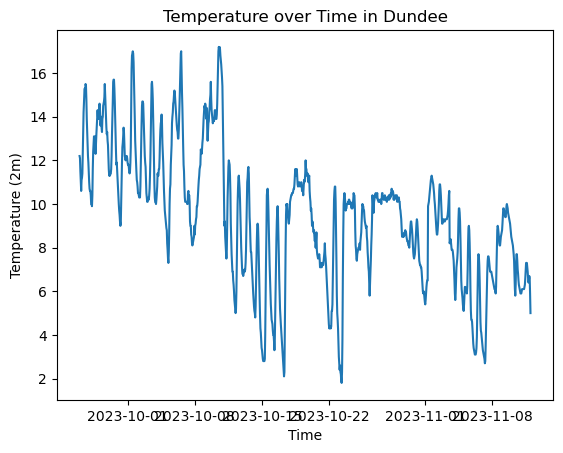

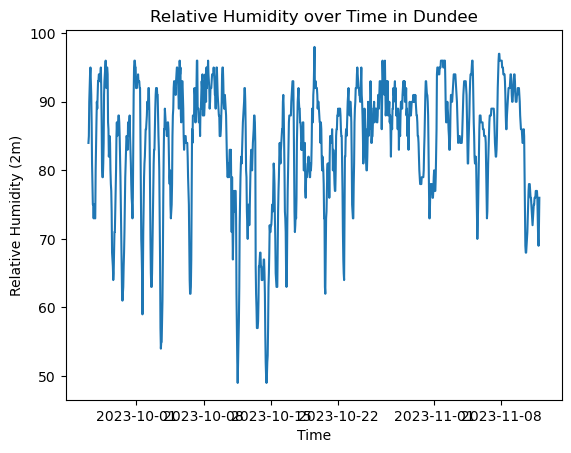

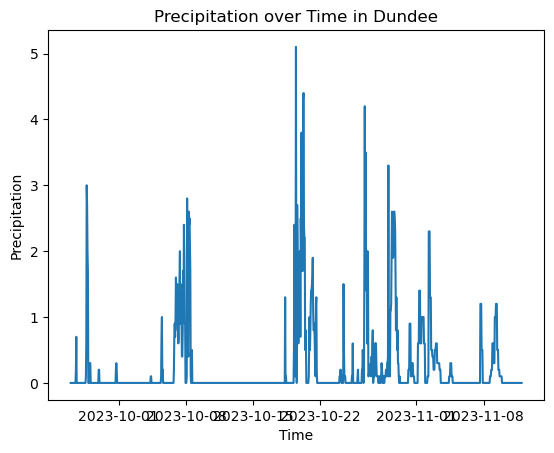

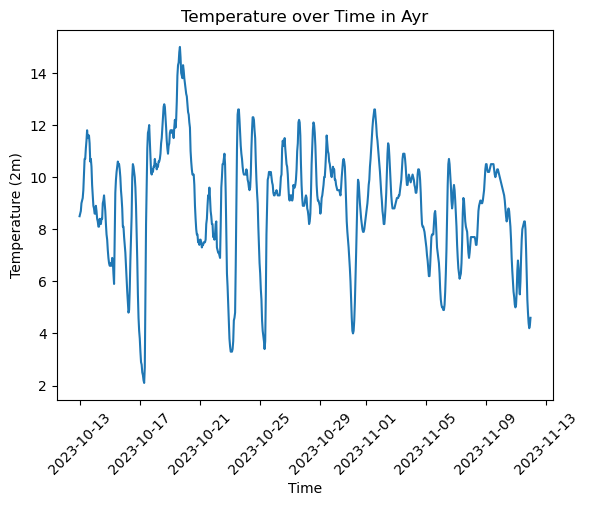

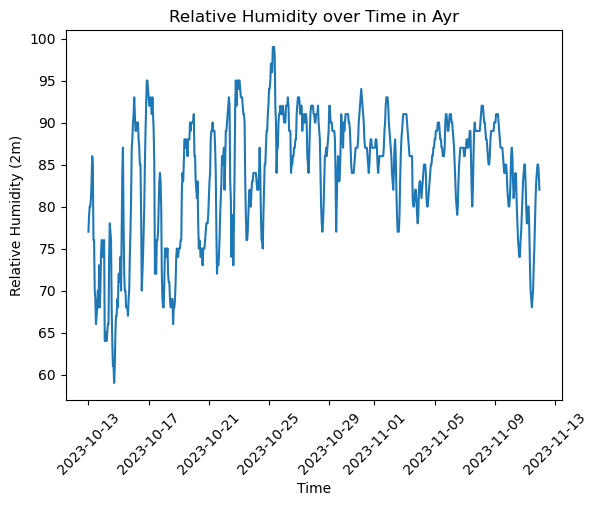

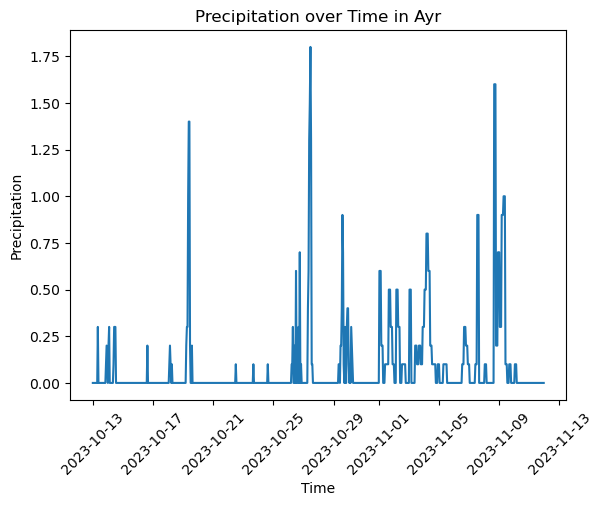

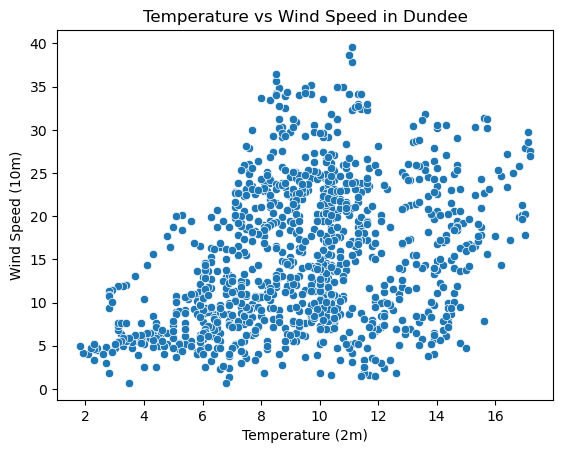

                            OLS Regression Results                            
Dep. Variable:          windspeed_10m   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     168.7
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           4.74e-36
Time:                        23:59:52   Log-Likelihood:                -3882.0
No. Observations:                1128   AIC:                             7768.
Df Residuals:                    1126   BIC:                             7778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3181      0.724      8.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data
dundee_path = '/Users/lily/Desktop/英国留学材料/第一学期/数据分析软件/Group Project/Dundee_Data_new.csv'
ayr_path = '/Users/lily/Desktop/英国留学材料/第一学期/数据分析软件/Group Project/Ayr_Data_New.csv'


dundee_data = pd.read_csv(dundee_path)
ayr_data = pd.read_csv(ayr_path)

# Convert the time string into a date time object, assuming the 'time' column is a parseable date time string
dundee_data['DateTime'] = pd.to_datetime(dundee_data['time'])
ayr_data['DateTime'] = pd.to_datetime(ayr_data['time'])

# Sort the data to ensure that the line chart is drawn in chronological order
dundee_data = dundee_data.sort_values('DateTime')
ayr_data = ayr_data.sort_values('DateTime')

# Dundee
# 1. Temperature over time in Dundee
sns.lineplot(x='DateTime', y='temperature_2m', data=dundee_data)
plt.title('Temperature over Time in Dundee')
plt.xlabel('Time')
plt.ylabel('Temperature (2m)')
plt.show()

# 2. Relative Humidity over time in Dundee
sns.lineplot(x='DateTime', y='relativehumidity_2m', data=dundee_data)
plt.title('Relative Humidity over Time in Dundee')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (2m)')
plt.show()

# 3. Precipitation over time in Dundee
sns.lineplot(x='DateTime', y='precipitation', data=dundee_data)
plt.title('Precipitation over Time in Dundee')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.show()

# Ary
# 4. Temperature over time in Ayr
sns.lineplot(x='DateTime', y='temperature_2m', data=ayr_data)
plt.title('Temperature over Time in Ayr')
plt.xlabel('Time')
plt.ylabel('Temperature (2m)')
plt.xticks(rotation=45)
plt.show()

# 5. Relative Humidity over time in Ayr
sns.lineplot(x='DateTime', y='relativehumidity_2m', data=ayr_data)
plt.title('Relative Humidity over Time in Ayr')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (2m)')
plt.xticks(rotation=45) 
plt.show()

# 6. Precipitation over time in Ayr
sns.lineplot(x='DateTime', y='precipitation', data=ayr_data)
plt.title('Precipitation over Time in Ayr')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.xticks(rotation=45) 
plt.show()


sns.scatterplot(x='temperature_2m', y='windspeed_10m', data=dundee_data)
plt.title('Temperature vs Wind Speed in Dundee')
plt.xlabel('Temperature (2m)')
plt.ylabel('Wind Speed (10m)')
plt.show()


# Use statsmodels
X = sm.add_constant(dundee_data['temperature_2m'])  
y = dundee_data['windspeed_10m']

model = sm.OLS(y, X).fit()


print(model.summary())

# Extract the OLS confidence interval for comparison
ols_ci = model.conf_int(alpha=0.05).loc['temperature_2m'].tolist()
print("OLS confidence interval for the slope:", ols_ci)

# Use bootstrap method to get confidence interval for the parameter
def bootstrap_ci(data, n_bootstraps, statistic, alpha):
    bootstraps = []
    for _ in range(n_bootstraps):
        sample = data.sample(frac=1, replace=True)
        bootstraps.append(statistic(sample))
    bootstrap_dist = np.percentile(bootstraps, [100*alpha/2, 100*(1-alpha/2)])
    return bootstrap_dist

def compute_slope(sample):
    X = sm.add_constant(sample['temperature_2m'])
    y = sample['windspeed_10m']
    model = sm.OLS(y, X).fit()
    return model.params[1]  # Return the slope parameter

# Call the bootstrap function to get the confidence interval
ci = bootstrap_ci(dundee_data, 1000, compute_slope, 0.05)
print("Bootstrap confidence interval for the slope:", ci)

# Compare the OLS and bootstrap confidence intervals
print("Comparing Confidence Intervals:")
print("OLS confidence interval:", ols_ci)
print("Bootstrap confidence interval:", ci)

- In our regression analysis, we present two distinct methods of confidence interval estimation for the slope coefficient associated with the variable `temperature_2m` on `windspeed_10m`: one derived from the Ordinary Least Squares (OLS) regression and the other from bootstrap resampling techniques.

- The OLS confidence interval for the slope is [0.803, 1.089], calculated under the assumption of normality of the residuals. This interval is typically used in parametric analysis and is dependent on the standard error of the estimate and the t-distribution.

- On the other hand, the bootstrap confidence interval is [0.830, 1.053], which is obtained by resampling the original dataset with replacement to create an empirical distribution of the slope estimate. The bootstrap method is a non-parametric approach that does not rely on the assumption of normality and is particularly useful in situations where the sample size is small or the data are not normally distributed.

- Upon comparison, both intervals suggest a positive relationship between `temperature_2m` and `windspeed_10m`. However, the bootstrap interval is narrower than the OLS interval, which might imply less variability in the bootstrap estimates or a non-normal distribution of the estimator. The overlap between the two intervals indicates consistency in the direction and magnitude of the effect, but the bootstrap method provides a potentially more accurate reflection of the uncertainty if the underlying assumptions of the OLS method do not hold.

- In conclusion, while both intervals offer valuable insights, the bootstrap interval may give a more robust estimate of the confidence interval for the regression slope, especially in cases where the normality assumption may be questionable.

In [7]:

dundee_data['DateTimeNumeric'] = (dundee_data['DateTime'] - dundee_data['DateTime'].min())  / np.timedelta64(1, 'D')


X = sm.add_constant(dundee_data['DateTimeNumeric'])  # Add constant term
y = dundee_data['temperature_2m']

model = sm.OLS(y, X).fit()


print(model.summary())


ols_ci = model.conf_int(alpha=0.05).loc['DateTimeNumeric'].tolist()
print("OLS confidence interval for the slope:", ols_ci)


def bootstrap_ci(data, n_bootstraps, statistic, alpha):
    bootstraps = []
    for _ in range(n_bootstraps):
        sample = data.sample(frac=1, replace=True)
        bootstraps.append(statistic(sample))
    bootstrap_dist = np.percentile(bootstraps, [100*alpha/2, 100*(1-alpha/2)])
    return bootstrap_dist

def compute_slope(sample):
    X = sm.add_constant(sample['DateTimeNumeric'])
    y = sample['temperature_2m']
    model = sm.OLS(y, X).fit()
    return model.params[1]  # Return the slope parameter


ci = bootstrap_ci(dundee_data, 1000, compute_slope, 0.05)
print("Bootstrap confidence interval for the slope:", ci)

print("Comparing Confidence Intervals:")
print("OLS confidence interval:", ols_ci)
print("Bootstrap confidence interval:", ci)


                            OLS Regression Results                            
Dep. Variable:         temperature_2m   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     585.4
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.77e-104
Time:                        00:23:47   Log-Likelihood:                -2638.0
No. Observations:                1128   AIC:                             5280.
Df Residuals:                    1126   BIC:                             5290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.5813      0.149     

- The analysis conducted herein utilizes two distinct methodologies to ascertain the confidence interval of the slope for the variable 'DateTimeNumeric' as it pertains to 'temperature_2m'. The first method derives from the Ordinary Least Squares (OLS) regression, while the second employs a bootstrap resampling technique.

- The OLS regression results yield a confidence interval for the slope of 'DateTimeNumeric' at [-0.144, -0.123]. This interval is predicated upon the classical assumptions of linear regression, including the normality of residuals and homoscedasticity. The negative values of the interval suggest an inverse relationship between the 'DateTimeNumeric' and 'temperature_2m', implying that as time progresses, there is a decrease in temperature.

- Concurrently, the bootstrap confidence interval for the slope is calculated to be [-0.142, -0.125], which is slightly narrower than the OLS interval. The bootstrap method, a non-parametric approach, does not hinge on the assumptions of normality and instead relies on the empirical distribution obtained through resampling the original dataset with replacement. The proximity of the two intervals suggests concurrence in the estimated effect magnitude, yet the bootstrap interval may afford a more robust reflection of the estimate's uncertainty, particularly when the OLS assumptions are not met or are questionable.

- In conclusion, while the OLS and bootstrap intervals are similar, corroborating the detected negative trend, the bootstrap interval's narrower range provides a potentially tighter estimation of the slope, offering a nuanced perspective on the uncertainty inherent in the regression estimate.

In [6]:

ayr_data['DateTimeNumeric'] = (ayr_data['DateTime'] - ayr_data['DateTime'].min()) / np.timedelta64(1, 'D')


X = sm.add_constant(ayr_data['DateTimeNumeric'])  # Add constant term
y = ayr_data['temperature_2m']

model = sm.OLS(y, X).fit()


print(model.summary())


ols_ci = model.conf_int(alpha=0.05).loc['DateTimeNumeric'].tolist()
print("OLS confidence interval for the slope:", ols_ci)

def bootstrap_ci(data, n_bootstraps, statistic, alpha):
    bootstraps = []
    for _ in range(n_bootstraps):
        sample = data.sample(frac=1, replace=True)
        bootstraps.append(statistic(sample))
    bootstrap_dist = np.percentile(bootstraps, [100*alpha/2, 100*(1-alpha/2)])
    return bootstrap_dist

def compute_slope(sample):
    X = sm.add_constant(sample['DateTimeNumeric'])
    y = sample['temperature_2m']
    model = sm.OLS(y, X).fit()
    return model.params[1]  


ci = bootstrap_ci(ayr_data, 1000, compute_slope, 0.05)
print("Bootstrap confidence interval for the slope:", ci)


print("Comparing Confidence Intervals:")
print("OLS confidence interval:", ols_ci)
print("Bootstrap confidence interval:", ci)


                            OLS Regression Results                            
Dep. Variable:         temperature_2m   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     15.73
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           8.04e-05
Time:                        00:23:00   Log-Likelihood:                -1581.6
No. Observations:                 720   AIC:                             3167.
Df Residuals:                     718   BIC:                             3176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5488      0.162     

- The OLS confidence interval for the slope is calculated as [-0.0556, -0.0188]. This interval is based on classical statistical inference, assuming the normality of the residuals and relying on the standard error of the slope estimate, as well as the t-distribution for its calculations. The negative values of the interval suggest that there is a statistically significant negative relationship between time and temperature; as time progresses, the temperature appears to decrease.

- In parallel, the bootstrap confidence interval for the slope is [-0.0539, -0.0187], derived from a non-parametric approach that does not make assumptions regarding the distribution of errors. Instead, it constructs an empirical distribution by repeatedly resampling the original data with replacement. The bootstrap interval closely aligns with the OLS interval, with a slightly narrower range, which could imply a more precise estimate.

- Both intervals substantiate a negative trend, yet the bootstrap interval's marginally tighter range suggests a potentially more refined and possibly more accurate estimation of the slope, indicative of the time-related decrease in temperature. This convergence of findings from both intervals reinforces the validity of the negative association observed between the two variables, with the bootstrap approach adding robustness to the inference, particularly if the underlying assumptions required for OLS are not fully satisfied.